# Stack Overflow

## Introduction 

In this module I did a Time series analysis of user activity.

In [2]:
def process(data):
    return " ".join([x.lower() for x in data])

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


csvname = 'posts8.csv'
df = pd.read_csv(csvname)
qdf = df[df['Type']=='Q']
qdf['Total_Questions'] = qdf.groupby('OwnerUserID')['OwnerUserID'].transform('count')
top = qdf.drop_duplicates('OwnerUserID').sort_values('Total_Questions',ascending = False).head(100)['OwnerUserID'].tolist()

myDict={}
for each in top:
    tm = qdf[qdf['OwnerUserID']==each]
    tm['WeekDay'] = pd.to_datetime(tm['CreationDate']).dt.weekday_name
    myDict.update({x: y['WeekDay'] for x,y in tm.groupby('OwnerUserID')})

vec = CountVectorizer(preprocessor=process).fit_transform(myDict.values()).toarray()



C:\Users\Maulik-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Maulik-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Here I Plot the 2 most similar and dissimilar Time series on a graph.

Most Similar Users are: 875317.0 and 3371056.0


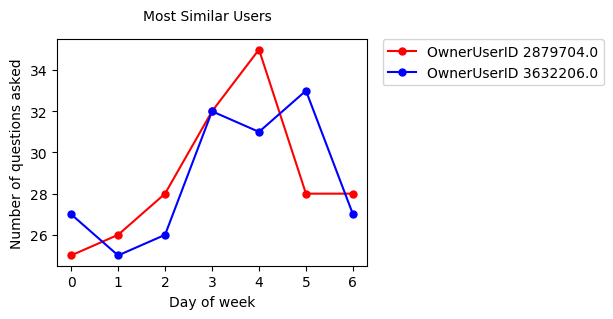

Most Dissimilar Users are: 2879704.0 and 3632206.0


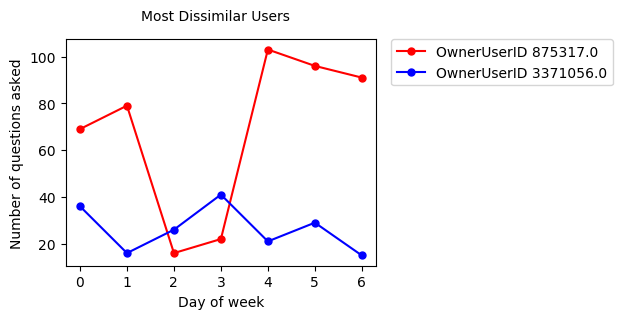

In [4]:
import sklearn.metrics.pairwise as metrics
import numpy as np
import matplotlib.pyplot as plt


ed = metrics.euclidean_distances(vec)
maxrow,maxcolumn = np.unravel_index(ed.argmax(), ed.shape)
min = ed[maxrow][maxcolumn]
for x in range(len(ed)):
    for y in range(len(ed)):
        if ed[x][y] < min:
            if x!=y:
                min = ed[x][y]
                minrow = x
                mincol = y
                
T = range(vec.shape[1])
print('Most Similar Users are: {} and {}'.format(top[maxrow],top[maxcolumn]))
plt.figure(1,figsize=(4, 3), dpi=100)
plt.plot(T,vec[minrow], color = 'red', marker='.', markersize=10, label='OwnerUserID {}'.format(top[minrow]))
plt.plot(T,vec[mincol], color = 'blue', marker='.', markersize=10, label='OwnerUserID {}'.format(top[mincol]))
plt.suptitle('Most Similar Users', fontsize=10)
plt.xlabel('Day of week', fontsize=10)
plt.ylabel('Number of questions asked', fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=10)
plt.show()


print('Most Dissimilar Users are: {} and {}'.format(top[minrow],top[mincol]))

plt.figure(1,figsize=(4, 3), dpi=100)
plt.plot(T,vec[maxrow],color = 'red', marker='.', markersize=10, label='OwnerUserID {}'.format(top[maxrow]))
plt.plot(T,vec[maxcolumn], color = 'blue',marker='.', markersize=10, label='OwnerUserID {}'.format(top[maxcolumn]))
plt.suptitle('Most Dissimilar Users', fontsize=10)
plt.xlabel('Day of week', fontsize=10)
plt.ylabel('Number of questions asked', fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=10)
plt.show()


My hypothesis was there are 2 categories of users. One which is active on weekends and one which is active on weekdays generally. Also the ones who are active on weekends are probably students and therefore they tend to ask more questions and the ones active on weekdays are probably professionals and they know what they are doing and therefore ask less number of questions. The graphs do support the hypothesis to an extent because as we can see the 2 most similar users are most active on near the weekend and they have asked a lot of questions and the 2 most dissimilar users are active at completely different days of the week and the one which is active during the week has asked a lot less number of questions than the one that is active on the weekend.

-----------------

Here I repeat the same experiment with using cosine distance as my similarity metric.

Most Similar Users are: 3371056.0 and 3736648.0


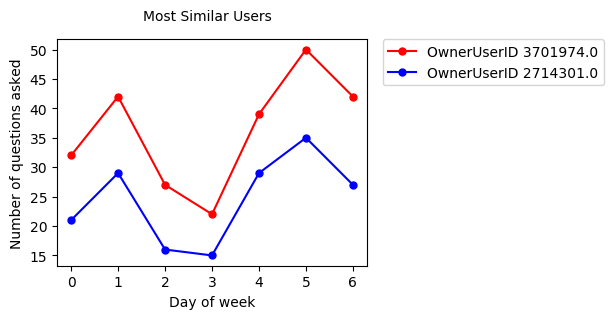

Most Dissimilar Users are: 3701974.0 and 2714301.0


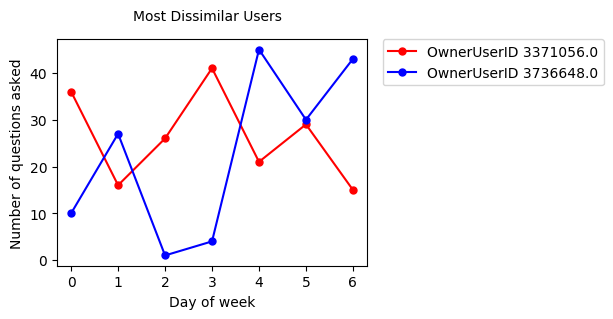

In [5]:
import sklearn.metrics.pairwise as metrics
import numpy as np
import matplotlib.pyplot as plt


cd = metrics.cosine_distances(vec)
maxrow,maxcolumn = np.unravel_index(cd.argmax(), cd.shape)
min = cd[maxrow][maxcolumn]
for x in range(len(cd)):
    for y in range(len(cd)):
        if cd[x][y] < min and x!=y:
                min = cd[x][y]
                minrow = x
                mincol = y
                
T = range(vec.shape[1])                
print('Most Similar Users are: {} and {}'.format(top[maxrow],top[maxcolumn]))
plt.figure(2,figsize=(4, 3), dpi=100)
plt.plot(T,vec[minrow], color = 'red', marker='.', markersize=10, label='OwnerUserID {}'.format(top[minrow]))
plt.plot(T,vec[mincol], color = 'blue', marker='.', markersize=10, label='OwnerUserID {}'.format(top[mincol]))
plt.suptitle('Most Similar Users', fontsize=10)
plt.xlabel('Day of week', fontsize=10)
plt.ylabel('Number of questions asked', fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=10)
plt.show()


print('Most Dissimilar Users are: {} and {}'.format(top[minrow],top[mincol]))

plt.figure(1,figsize=(4, 3), dpi=100)
plt.plot(T,vec[maxrow],color = 'red', marker='.', markersize=10, label='OwnerUserID {}'.format(top[maxrow]))
plt.plot(T,vec[maxcolumn], color = 'blue',marker='.', markersize=10, label='OwnerUserID {}'.format(top[maxcolumn]))
plt.suptitle('Most Dissimilar Users', fontsize=10)
plt.xlabel('Day of week', fontsize=10)
plt.ylabel('Number of questions asked', fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=10)
plt.show()

I chose euclidean distance because that gives us the straight line distance between 2 points which is what I thought would be a better option than L1 Distance (Manhattan Distance).
My next instinct was to choose cosine distance because that gives us the difference in distance of each point from Origin along with the direction which I hoped would work better on n-dimensional data. 
I feel cosine distance worked better as can be seen from the similar users graph how both the users follow the same trend based on the day of the week.